# Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

## Same csv file used in week 1 boot camp

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [48]:
# Feature Scaling
filepath = "datasets/DC_Properties.csv"

props_df = pd.read_csv(filepath)
props_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [49]:
# List column names
props_df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [50]:
# we need to work with PRICE column so determine rows with NaN values
props_df['PRICE'].isna().sum()

60741

In [51]:
# Also check for null values
props_df['PRICE'].isnull().sum()

60741

In [52]:
# Can't just drop the rows with no PRICE data since there are so many
# Use the word location to determine mean price of house there and use it
#rows where the age is missing
missing_price = props_df.loc[props_df['PRICE'].isnull()]
missing_price.head()


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
10,10,3,0,Forced Air,N,3.0,12,5,1890.0,1950.0,...,-77.040760,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [53]:
# get index numbers of missing rows - we'll use this later
missingIndexes = list(missing_price.index)
#len(missingIndexes)
#str = props_df.iat[missingIndexes]
#str

In [54]:
# Check for missing ward values
print(props_df['WARD'].isna().sum())

1


In [55]:
props_df['WARD'].fillna('Ward 1', inplace=True)

In [56]:
# table of avg price per ward
#out = props_df.groupby(['WARD', 'CNDTN', 'STORIES'])['PRICE'].mean()
#out

#fill missing values for age based on survival status, sex, and passenger class
#df['age'].fillna(df.groupby(['survived', 'sex', 'pclass'])['age'].transform('mean'), inplace=True)
props_df['PRICE'].fillna(props_df.groupby(['WARD'])['PRICE'].transform('mean'), inplace=True)

#modeldf['TravelAlone']=np.where((modeldf['family_num'] > 0), 0, 1)


#avgWardPrice = props_df.groupby(['WARD'])['PRICE'].mean()
#print(avgWardPrice['Ward 1'])
#print(avgWardPrice['Ward 2'])

In [57]:
# Check for missing price values again
print(props_df['PRICE'].isnull().sum())
print(props_df['PRICE'].isna().sum())
print(props_df['PRICE'].notna().sum())
print(props_df['WARD'].isna().sum())
test = props_df['PRICE'].isna()
#type(test)
#len(test)

0
0
158957
0


In [58]:
props_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                 158957
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [59]:
props_df.drop(['HEAT','GRADE','STRUCT','EXTWALL','ROOF', 'INTWALL','NATIONALGRID','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','X','Y','QUADRANT'], axis=1, inplace=True)

In [60]:
props_df.count()

Unnamed: 0           158957
BATHRM               158957
HF_BATHRM            158957
AC                   158957
NUM_UNITS            106696
ROOMS                158957
BEDRM                158957
AYB                  158686
YR_RMDL               80928
EYB                  158957
STORIES              106652
SALEDATE             132187
PRICE                158957
QUALIFIED            158957
SALE_NUM             158957
GBA                  106696
BLDG_NUM             158957
STYLE                106696
CNDTN                106696
KITCHENS             106695
FIREPLACES           158957
USECODE              158957
LANDAREA             158957
GIS_LAST_MOD_DTTM    158957
SOURCE               158957
CMPLX_NUM             52261
LIVING_GBA            52261
FULLADDRESS          106040
CITY                 106051
STATE                106051
ZIPCODE              158956
LATITUDE             158956
LONGITUDE            158956
ASSESSMENT_NBHD      158956
CENSUS_TRACT         158956
WARD                

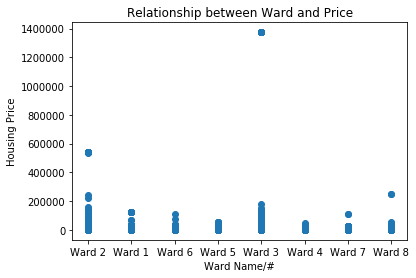

In [61]:
# compare home price in Wards
plt.scatter(props_df['WARD'], (props_df['PRICE']/100)) 
plt.xlabel("Ward Name/#") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Ward and Price") 
plt.show()

In [62]:
# Descriptive statistics
props_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,106695.000000,158957.000000,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,1.219251,2.374674,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,0.621170,737.295595,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,0.000000,0.000000,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,1.000000,0.000000,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,1.000000,0.000000,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,1.000000,1.000000,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,44.000000,293920.000000,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B05C935C0>,
      dtype=object)

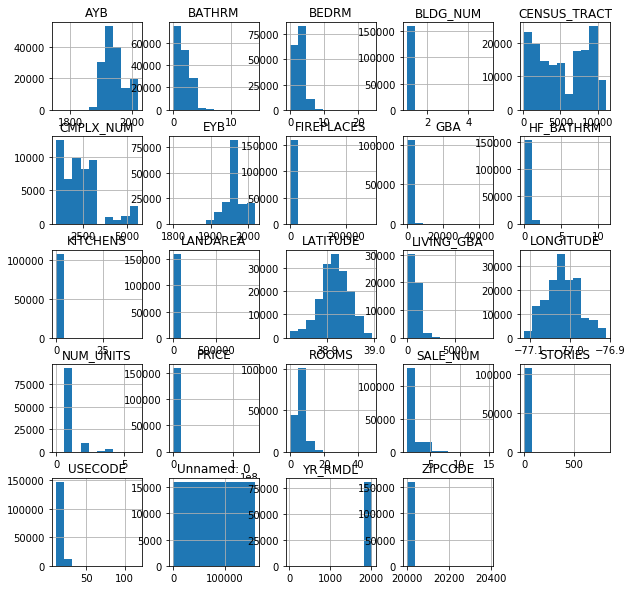

In [63]:
#plot the frequency count for each column
props_df.hist(figsize=(10,10))

In [64]:
#Method 1: manual calculation of z-scores for 'PRICE' column

#mean for the column
mean = props_df['PRICE'].mean()

#standard deviation of the column
std = props_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (props_df['PRICE'] - mean)/std

In [65]:
#values for mean and standard deviation of 'PRICE column'
format(mean, '.2f'), format(std, '.2f')
#mean, std

('919807.21', '5582000.32')

In [66]:
price_z_manual.head()

0    0.031385
1    0.032025
2    0.211428
3    0.122213
4    0.032025
Name: PRICE, dtype: float64

In [67]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(props_df[['PRICE']])

In [68]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

(2.807179539481387e-17, 1.0)

In [69]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
p_z_col = pd.Series(price_zscore.reshape(-1))

In [70]:
p_z_col.head()

0    0.031385
1    0.032025
2    0.211429
3    0.122213
4    0.032025
dtype: float64

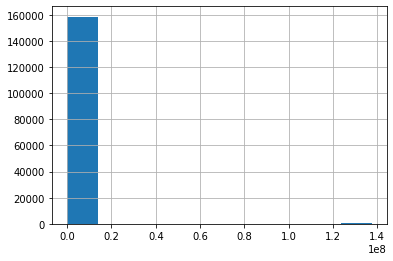

In [71]:
#BEFORE: frequency count plot of 'PRICE' column
props_df['PRICE'].hist()

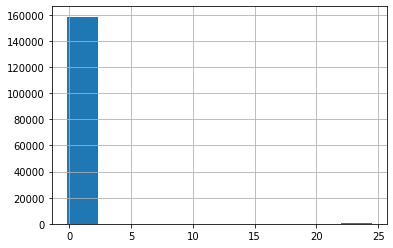

In [72]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
p_z_col.hist()

In [73]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(props_df.columns)
colnames

['Unnamed: 0',
 'BATHRM',
 'HF_BATHRM',
 'AC',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALEDATE',
 'PRICE',
 'QUALIFIED',
 'SALE_NUM',
 'GBA',
 'BLDG_NUM',
 'STYLE',
 'CNDTN',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA',
 'GIS_LAST_MOD_DTTM',
 'SOURCE',
 'CMPLX_NUM',
 'LIVING_GBA',
 'FULLADDRESS',
 'CITY',
 'STATE',
 'ZIPCODE',
 'LATITUDE',
 'LONGITUDE',
 'ASSESSMENT_NBHD',
 'CENSUS_TRACT',
 'WARD',
 'SQUARE']

In [74]:
#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(props_df), columns = colnames)

#plot frequency distribution with same scale range
#zscore_df.hist(figsize=(10,10), sharex=True)

ValueError: could not convert string to float: 'Y'